In [89]:
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
df_see1 = pd.read_csv("./2016-us-election/county_facts.csv")
#X = df_see.drop("gene",axis=1).values.astype("int") # to drop the gene column and convert data to int
samples1 = df_see1.columns

In [91]:
samples1

Index(['fips', 'area_name', 'state_abbreviation', 'PST045214', 'PST040210',
       'PST120214', 'POP010210', 'AGE135214', 'AGE295214', 'AGE775214',
       'SEX255214', 'RHI125214', 'RHI225214', 'RHI325214', 'RHI425214',
       'RHI525214', 'RHI625214', 'RHI725214', 'RHI825214', 'POP715213',
       'POP645213', 'POP815213', 'EDU635213', 'EDU685213', 'VET605213',
       'LFE305213', 'HSG010214', 'HSG445213', 'HSG096213', 'HSG495213',
       'HSD410213', 'HSD310213', 'INC910213', 'INC110213', 'PVY020213',
       'BZA010213', 'BZA110213', 'BZA115213', 'NES010213', 'SBO001207',
       'SBO315207', 'SBO115207', 'SBO215207', 'SBO515207', 'SBO415207',
       'SBO015207', 'MAN450207', 'WTN220207', 'RTN130207', 'RTN131207',
       'AFN120207', 'BPS030214', 'LND110210', 'POP060210'],
      dtype='object')

In [92]:
df_see1.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO415207,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,8.3,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,1.2,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,0.7,31.7,0,0,598175,12003,88157,131,594.44,91.8
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,1.3,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,0.0,27.0,0,0,188337,6334,0,8,884.88,31.0


In [93]:
df_see2 = pd.read_csv("./2016-us-election/county_facts_dictionary.csv")
#X = df_see.drop("gene",axis=1).values.astype("int") # to drop the gene column and convert data to int
samples2 = df_see2.columns

In [94]:
df_see2.head()

,column_name,description
0,PST045214,"Population, 2014 estimate"
1,PST040210,"Population, 2010 (April 1) estimates base"
2,PST120214,"Population, percent change - April 1, 2010 to ..."
3,POP010210,"Population, 2010"
4,AGE135214,"Persons under 5 years, percent, 2014"


In [95]:
df_see2["description"]

0                             Population, 2014 estimate
1             Population, 2010 (April 1) estimates base
2     Population, percent change - April 1, 2010 to ...
3                                      Population, 2010
4                  Persons under 5 years, percent, 2014
5                 Persons under 18 years, percent, 2014
6              Persons 65 years and over, percent, 2014
7                         Female persons, percent, 2014
8                            White alone, percent, 2014
9        Black or African American alone, percent, 2014
10    American Indian and Alaska Native alone, perce...
11                           Asian alone, percent, 2014
12    Native Hawaiian and Other Pacific Islander alo...
13                     Two or More Races, percent, 2014
14                    Hispanic or Latino, percent, 2014
15    White alone, not Hispanic or Latino, percent, ...
16    Living in same house 1 year & over, percent, 2...
17             Foreign born persons, percent, 20

In [96]:
samples2

Index(['column_name', 'description'], dtype='object')

In [97]:
df_see3 = pd.read_csv("./2016-us-election/primary_results.csv")
#X = df_see.drop("gene",axis=1).values.astype("int") # to drop the gene column and convert data to int
samples3 = df_see3.columns

In [98]:
df_see3[df_see3["county"]=="Abbot"]

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
8121,Maine,ME,Abbot,92300001.0,Democrat,Bernie Sanders,1,1.0
8122,Maine,ME,Abbot,92300001.0,Democrat,Hillary Clinton,0,0.0


item: election 2016 fact

Attributes:the differentstats,'fips','area_name','state_abbreviation':categorical attributes
the other columns are quantitive attributes

state:categorical	
state_abbreviation:categorical	
county:categorical 
fips:quantitative	
party:categorical	
candidate:categorical	
votes:quantitative	
fraction_votes:quantitative

In [99]:
df_see3_manip = df_see3[["county","party","votes"]].groupby(["county","party"]).sum()

df_see3_manip['county'] = df_see3_manip.index
df_see3_manip.head()

votes                   county
county    party                                     
Abbeville Democrat     1813    (Abbeville, Democrat)
          Republican   3667  (Abbeville, Republican)
Abbot     Democrat        1        (Abbot, Democrat)
Abington  Democrat     2511     (Abington, Democrat)
          Republican   2049   (Abington, Republican)

In [100]:
counties = df_see3['county'].unique()
df = pd.DataFrame(columns = ['county'])
df['county'] = counties

In [101]:
df = df_see3[df_see3["party"]=="Democrat"]
df_democrats = df[["county", "votes"]].groupby(["county"]).sum()
df = df_see3[df_see3["party"]=="Republican"]
df_republicans = df[["county", "votes"]].groupby(["county"]).sum()

In [102]:
#df['Democrats'] = df_see3_manip[df_see3["party"]=="Democrat"]

In [103]:
counties = df_see3['county'].unique()
df = pd.DataFrame(columns = ['county'])
df['county'] = counties
df=df.set_index('county')
df['Democrat'] = df_democrats
df['Republican'] = df_republicans
df=df.fillna(0)

In [104]:
df['proportion'] = df['Democrat']/(df['Democrat']+df['Republican'])
df['democratWin'] = df['proportion']>0.5

In [105]:
df

,Democrat,Republican,proportion,democratWin
county,,,,
Autauga,2931.0,11839.0,0.198443,False
Baldwin,11783.0,53544.0,0.180370,False
Barbour,4469.0,5395.0,0.453062,False
Bibb,16764.0,19028.0,0.468373,False
Blount,6057.0,35487.0,0.145797,False
Bullock,2629.0,541.0,0.829338,True
Butler,45205.0,115176.0,0.281860,False
Calhoun,26301.0,46099.0,0.363273,False
Chambers,4191.0,11246.0,0.271491,False


In [106]:
df.to_csv('clean_data.csv')

Let's to join both datasets

In [107]:
#df_see1.rename(columns = {"county":"area_name"})
df_see1["county"] = df_see1.area_name.str.replace(" County","")

In [108]:
df_see1.head()

,fips,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,SBO015207,MAN450207,WTN220207,RTN130207,RTN131207,AFN120207,BPS030214,LND110210,POP060210,county
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,28.8,5319456312,4174286516,3917663456,12990,613795732,1046363,3531905.43,87.4,United States
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,28.1,112858843,52252752,57344851,12364,6426342,13369,50645.33,94.4,Alabama
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,31.7,0,0,598175,12003,88157,131,594.44,91.8,Autauga
3,1003,Baldwin County,AL,200111,182265,9.8,182265,5.6,22.2,18.7,...,27.3,1410273,0,2966489,17166,436955,1384,1589.78,114.6,Baldwin
4,1005,Barbour County,AL,26887,27457,-2.1,27457,5.7,21.2,16.5,...,27.0,0,0,188337,6334,0,8,884.88,31.0,Barbour


In [109]:
df_see3.head()

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
0,Alabama,AL,Autauga,1001.0,Democrat,Bernie Sanders,544,0.182
1,Alabama,AL,Autauga,1001.0,Democrat,Hillary Clinton,2387,0.800
2,Alabama,AL,Baldwin,1003.0,Democrat,Bernie Sanders,2694,0.329
3,Alabama,AL,Baldwin,1003.0,Democrat,Hillary Clinton,5290,0.647
4,Alabama,AL,Barbour,1005.0,Democrat,Bernie Sanders,222,0.078


In [110]:
df_all = pd.merge(df_see1,df_see3,how = 'left', left_on=['state_abbreviation',"county"], right_on = ["state_abbreviation","county"])

In [111]:
df_all.head()

,fips_x,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,BPS030214,LND110210,POP060210,county,state,fips_y,party,candidate,votes,fraction_votes
0,0,United States,NaN,318857056,308758105,3.3,308745538,6.2,23.1,14.5,...,1046363,3531905.43,87.4,United States,NaN,NaN,NaN,NaN,NaN,NaN
1,1000,Alabama,NaN,4849377,4780127,1.4,4779736,6.1,22.8,15.3,...,13369,50645.33,94.4,Alabama,NaN,NaN,NaN,NaN,NaN,NaN
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,131,594.44,91.8,Autauga,Alabama,1001.0,Democrat,Bernie Sanders,544.0,0.182
3,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,131,594.44,91.8,Autauga,Alabama,1001.0,Democrat,Hillary Clinton,2387.0,0.800
4,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,131,594.44,91.8,Autauga,Alabama,1001.0,Republican,Ben Carson,1764.0,0.146


In [112]:
df_all[df_all["area_name"]=="Autauga County"]

,fips_x,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,BPS030214,LND110210,POP060210,county,state,fips_y,party,candidate,votes,fraction_votes
2,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,131,594.44,91.8,Autauga,Alabama,1001.0,Democrat,Bernie Sanders,544.0,0.182
3,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,131,594.44,91.8,Autauga,Alabama,1001.0,Democrat,Hillary Clinton,2387.0,0.800
4,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,131,594.44,91.8,Autauga,Alabama,1001.0,Republican,Ben Carson,1764.0,0.146
5,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,131,594.44,91.8,Autauga,Alabama,1001.0,Republican,Donald Trump,5387.0,0.445
6,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,131,594.44,91.8,Autauga,Alabama,1001.0,Republican,John Kasich,421.0,0.035
7,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,131,594.44,91.8,Autauga,Alabama,1001.0,Republican,Marco Rubio,1785.0,0.148
8,1001,Autauga County,AL,55395,54571,1.5,54571,6.0,25.2,13.8,...,131,594.44,91.8,Autauga,Alabama,1001.0,Republican,Ted Cruz,2482.0,0.205


In [113]:
# persons over 18 years old:

df_all["over_18"] = 100 - df_all["AGE135214"] - df_all["AGE295214"]

In [114]:
df_all["over_18"].head()

0    70.7
1    71.1
2    68.8
3    68.8
4    68.8
Name: over_18, dtype: float64

Let's see now the counties that voted more for Trump, their level of studies:

In [115]:
df_trump = df_all[df_all["candidate"]=="Donald Trump"]

In [116]:
df_trump["fraction_trump"] = df_trump["votes"]/((df_trump["PST045214"]*df_trump["over_18"])/100)

C:\Users\Mgava\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [117]:
df_trump["fraction_trump"] 

5        0.141347
12       0.163469
19       0.087003
26       0.118105
33       0.182125
40       0.040219
47       0.120549
54       0.107209
61       0.087554
68       0.142588
75       0.172953
82       0.107802
89       0.128863
96       0.193812
103      0.198005
110      0.120432
117      0.097429
124      0.082922
131      0.147288
138      0.168803
145      0.150327
152      0.182431
159      0.119666
166      0.018412
173      0.127215
180      0.148069
187      0.103833
194      0.115814
201      0.201526
208      0.098689
           ...   
17304    0.155590
17309    0.109318
17314    0.090270
17319    0.113517
17324    0.093869
17329    0.111550
17334    0.096320
17339    0.156046
17344    0.086176
17349    0.112298
17354    0.090838
17359    0.153283
17364    0.113734
17369    0.104380
17374    0.165878
17379    0.141227
17384    0.079130
17389    0.145021
17394    0.118903
17399    0.119977
17404    0.191483
17409    0.099689
17414    0.162546
17419    0.100271
17424    0

In [118]:
df_trump_sorted = df_trump.sort_values(by = "fraction_trump", ascending = 0)

In [119]:
df_trump_sorted[["state","county","EDU685213","fraction_trump"]]

,state,county,EDU685213,fraction_trump
8946,Montana,Petroleum,15.4,0.454261
8801,Montana,Carter,16.4,0.383242
8856,Montana,Garfield,13.0,0.381971
9482,Nebraska,Thomas,22.7,0.374541
8951,Montana,Phillips,15.9,0.367025
9242,Nebraska,Grant,17.7,0.365520
8961,Montana,Powder River,19.9,0.362203
8836,Montana,Fallon,16.1,0.356206
13075,South Dakota,Harding,35.1,0.341547
9312,Nebraska,Keya Paha,17.2,0.337759


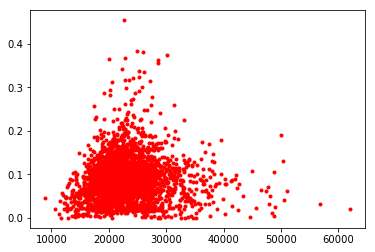

In [120]:
plt.plot(df_trump_sorted["INC910213"], df_trump_sorted["fraction_trump"],"r.")
plt.show()

# Most voted candidate per county

In [121]:
df_all["proportion_votes"] = df_all["votes"]/((df_all["PST045214"]*df_all["over_18"])/100)

In [122]:
df_all[df_all["county"]=="Tarrant"]

,fips_x,area_name,state_abbreviation,PST045214,PST040210,PST120214,POP010210,AGE135214,AGE295214,AGE775214,...,POP060210,county,state,fips_y,party,candidate,votes,fraction_votes,over_18,proportion_votes
15437,48439,Tarrant County,TX,1945360,1809537,7.5,1809034,7.3,27.1,10.2,...,2094.7,Tarrant,Texas,48439.0,Democrat,Bernie Sanders,35507.0,0.342,65.6,0.027823
15438,48439,Tarrant County,TX,1945360,1809537,7.5,1809034,7.3,27.1,10.2,...,2094.7,Tarrant,Texas,48439.0,Democrat,Hillary Clinton,67590.0,0.651,65.6,0.052964
15439,48439,Tarrant County,TX,1945360,1809537,7.5,1809034,7.3,27.1,10.2,...,2094.7,Tarrant,Texas,48439.0,Republican,Ben Carson,9945.0,0.047,65.6,0.007793
15440,48439,Tarrant County,TX,1945360,1809537,7.5,1809034,7.3,27.1,10.2,...,2094.7,Tarrant,Texas,48439.0,Republican,Donald Trump,56023.0,0.262,65.6,0.043900
15441,48439,Tarrant County,TX,1945360,1809537,7.5,1809034,7.3,27.1,10.2,...,2094.7,Tarrant,Texas,48439.0,Republican,John Kasich,9718.0,0.045,65.6,0.007615
15442,48439,Tarrant County,TX,1945360,1809537,7.5,1809034,7.3,27.1,10.2,...,2094.7,Tarrant,Texas,48439.0,Republican,Marco Rubio,43689.0,0.204,65.6,0.034235
15443,48439,Tarrant County,TX,1945360,1809537,7.5,1809034,7.3,27.1,10.2,...,2094.7,Tarrant,Texas,48439.0,Republican,Ted Cruz,88867.0,0.416,65.6,0.069636


In [123]:

df_votes = df_all[["state","county","candidate","votes","EDU685213","RHI125214","RHI225214"]].groupby(["county","candidate"]).max()#.sort_values(by="votes", ascending = 0)
df_votes
df_most_voted = df_all.sort_values(["votes"],ascending=False).groupby('county').head(1)
df_most_voted = df_most_voted[["state","county","candidate","votes","party","EDU685213","RHI125214","RHI225214"]]
df_ed=df_most_voted
#df_most_voted.to_csv('most_voted.csv')

In [124]:
df_ed["educated (bacelor and higher)"]=df_ed["EDU685213"]
df_ed["persentage of white people"]=df_ed["RHI125214"]
df_ed["persentage of black people"]=df_ed["RHI225214"]

In [125]:
df_ed=df_ed.drop(["EDU685213","RHI125214","RHI225214"],axis=1)

In [126]:
df_ed["white-black percentage difference"]=df_ed["persentage of white people"]-df_ed["persentage of black people"]

In [127]:
df_ed['more w']=df_ed["white-black percentage difference"]>=0

In [128]:
#df_ed.to_csv('ed.csv')

In [129]:
df_ed[['white-black percentage difference','persentage of white people','persentage of black people']]=df_ed[['white-black percentage difference','persentage of white people','persentage of black people']].fillna(0.0).astype('int')

In [130]:
df_ed=df_ed.drop(["party","state"],axis=1)

In [131]:
df_ed

,county,candidate,votes,educated (bacelor and higher),persentage of white people,persentage of black people,white-black percentage difference,more w
1189,Los Angeles,Hillary Clinton,590502.0,29.7,71,9,62,True
12451,Philadelphia,Hillary Clinton,212785.0,23.9,45,44,1,True
7510,Wayne,Hillary Clinton,163886.0,21.3,54,39,15,True
14611,Harris,Hillary Clinton,156729.0,28.4,70,19,51,True
1245,Orange,Donald Trump,146888.0,36.8,73,2,71,True
539,Maricopa,Donald Trump,144522.0,29.8,84,5,78,True
1279,San Diego,Hillary Clinton,139813.0,34.6,76,5,70,True
1604,Broward,Hillary Clinton,132527.0,29.9,64,28,36,True
1826,Miami-Dade,Hillary Clinton,129467.0,26.3,77,18,59,True
11059,Cuyahoga,Hillary Clinton,125914.0,29.7,64,30,34,True


In [132]:
df_ed.to_csv('ed.csv')